In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Read tenv3 data
# tenv3 : Trimble Exchangeable Navigation Data Format Version 3
df = pd.read_fwf("./GNSS_data/LHAZ.tenv3", infer_nrows=10)

In [38]:
df

,site,YYMMMDD,yyyy.yyyy,__MJD,week,d,reflon,_e0(m),__east(m),____n0(m),...,_ant(m),sig_e(m),sig_n(m),sig_u(m),__corr_en,__corr_eu,__corr_nu,_latitude(deg),_longitude(deg),__height(m)
0,LHAZ,99SEP22,1999.7235,51443,1028,3,91.1,389,0.472968,3282128,...,0.135,0.001313,0.001513,0.006804,0.087628,-0.111188,-0.238266,29.657331,-268.895977,3624.58532
1,LHAZ,99OCT19,1999.7974,51470,1032,2,91.1,389,0.482804,3282128,...,0.135,0.000953,0.001049,0.004448,0.143234,-0.156447,-0.266962,29.657331,-268.895977,3624.59189
2,LHAZ,99OCT20,1999.8001,51471,1032,3,91.1,389,0.480112,3282128,...,0.135,0.000952,0.001071,0.004834,0.071542,-0.092611,-0.295243,29.657331,-268.895977,3624.59788
3,LHAZ,99OCT21,1999.8029,51472,1032,4,91.1,389,0.478562,3282128,...,0.135,0.000939,0.001124,0.004559,0.080660,-0.095188,-0.293471,29.657331,-268.895977,3624.58922
4,LHAZ,99OCT23,1999.8084,51474,1032,6,91.1,389,0.480902,3282128,...,0.135,0.000867,0.001038,0.004295,0.103798,-0.150357,-0.265374,29.657331,-268.895977,3624.57776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7918,LHAZ,23AUG18,2023.6277,60174,2275,5,91.1,389,1.592153,3282128,...,0.133,0.000807,0.000844,0.003627,-0.007724,-0.088763,-0.252641,29.657335,-268.895966,3624.60992
7919,LHAZ,23AUG19,2023.6304,60175,2275,6,91.1,389,1.590501,3282128,...,0.133,0.000814,0.000837,0.003632,0.025628,-0.096292,-0.241287,29.657335,-268.895966,3624.60719
7920,LHAZ,23AUG20,2023.6331,60176,2276,0,91.1,389,1.591724,3282128,...,0.133,0.000806,0.000828,0.003652,0.023336,-0.083915,-0.259930,29.657335,-268.895966,3624.60890
7921,LHAZ,23AUG21,2023.6359,60177,2276,1,91.1,389,1.591319,3282128,...,0.133,0.000896,0.000953,0.004037,0.057443,-0.081631,-0.224446,29.657335,-268.895966,3624.61124


Text(0, 0.5, 'Up (m)')

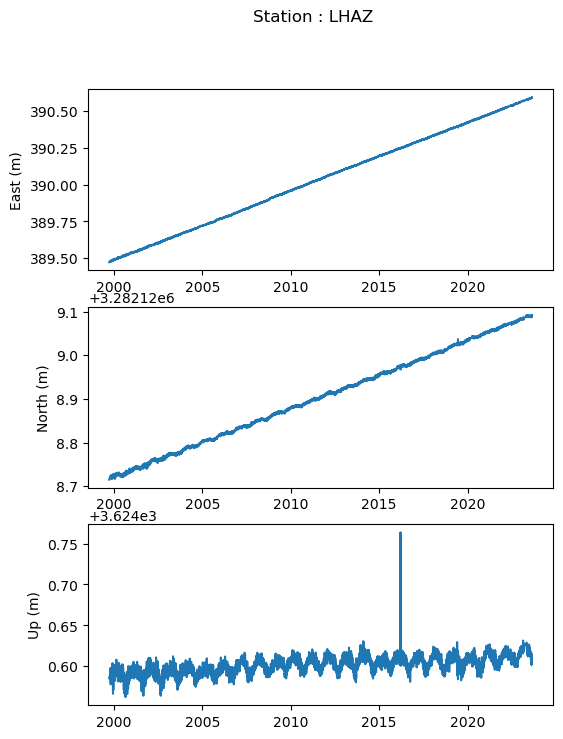

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(6, 8))
fig.suptitle(f"Station : {df['site'].iloc[0]}")
axs[0].plot(df["yyyy.yyyy"], df["_e0(m)"]+df["__east(m)"])
axs[0].set_ylabel("East (m)")
axs[1].plot(df["yyyy.yyyy"], df["____n0(m)"]+df["_north(m)"])
axs[1].set_ylabel("North (m)")
axs[2].plot(df["yyyy.yyyy"], df["u0(m)"]+df["____up(m)"])
axs[2].set_ylabel("Up (m)")

In [40]:
up_corrected = np.loadtxt("./GNSS_data/LHAZ.tenv3_Up.sari", skiprows=8)

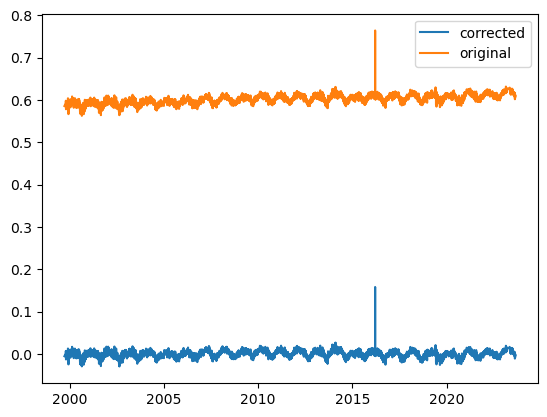

In [42]:
plt.plot(up_corrected[:,0], up_corrected[:,4], label="corrected")
plt.plot(up_corrected[:,0], up_corrected[:,1], label="original")
plt.legend()